# SugarSense Classification Project

Welcome to the SugarSense Classification project's Jupyter Notebook! In this notebook, we'll explore the process of classifying users into diabetes and non-diabetes groups based on a set of questions and answers (QnA). The classification algorithm used in this project aims to provide an initial assessment of diabetes risk and encourage users to seek professional medical advice if needed.

## About the Developer

This project was developed by Saumitra Kulkarni

Feel free to follow along as we delve into the details of the classification process and gain insights into the potential impact of this project. Let's get started!




# **Project Phase 1**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df.head(10)
df.shape

(258100, 22)

# Data Cleaning

## Dropping Data Columns

In [4]:
df = df.drop(columns=['AnyHealthcare'])
df = df.drop(columns=['NoDocbcCost'])
df = df.drop(columns=['Education'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,2.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,12.0,5.0
1,0.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,5.0,6.0
2,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,5.0
3,0.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,5.0
4,0.0,1.0,1.0,NaN,36.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,5.0,2.0,NaN,1.0,1.0,4.0,4.0


## Removing Duplicates

In [5]:
duplicates = df[df.duplicated()]
print("Duplicate records found: ",len(duplicates))
duplicates.head()

Duplicate records found:  37295


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
504,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,8.0
1119,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,10.0,6.0
2022,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,8.0
2065,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,8.0
2238,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
print("Data after removing duplicates: ", df.shape)

Data after removing duplicates:  (220805, 19)


## Renaming Columns

In [8]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Income'],
      dtype='object')

In [9]:
df = df.rename(columns={'Diabetes_012': 'IsDiabetes'})
df = df.rename(columns={'HighChol': 'HighCholestrol'})
df = df.rename(columns={'CholCheck': 'CholestrolCheck'})
df = df.rename(columns={'BMI': 'BodyMassIndex'})
df = df.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})
df = df.rename(columns={'PhysActivity': 'PhysicalActivity'})
df = df.rename(columns={'HvyAlcoholConsump': 'HighAlcohol'})
df = df.rename(columns={'GenHlth': 'GeneralHealth'})
df = df.rename(columns={'MentHlth': 'MentalHealth'})
df = df.rename(columns={'PhysHlth': 'PhysicalHealth'})
df = df.rename(columns={'DiffWalk': 'DifficultyWalking'})

In [10]:
df.head()

,IsDiabetes,HighBP,HighCholestrol,CholestrolCheck,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income
0,2.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,12.0,5.0
1,0.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,5.0,6.0
2,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,5.0
3,0.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,5.0
4,0.0,1.0,1.0,NaN,36.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,5.0,2.0,NaN,1.0,1.0,4.0,4.0


## Removing rows that have not checked cholestrol in last 5 years

In [11]:
print("Before: ", df.shape)
df = df[df['CholestrolCheck'] != 0]
print("After: ", df.shape)

# as now all the CholestrolCheck columns contains 1 only we don't need this column anymore
df = df.drop(columns=['CholestrolCheck'])

Before:  (220805, 19)
After:  (210098, 19)


## Filling in Missing Values

In [12]:
# null values in Income
income_na = df['Income'].isna().sum()
print("Income null count: ", income_na)
print(df['Income'].value_counts())

# filling missing values for Education, Income Columns
df['Income'] = df['Income'].fillna(round(df['Income'].mean()))
print(df.head())

Income null count:  1404
8.0    62121
7.0    35816
6.0    31940
5.0    23782
4.0    19062
3.0    15426
2.0    11248
1.0     9299
Name: Income, dtype: int64
   IsDiabetes  HighBP  HighCholestrol  BodyMassIndex  Smoker  Stroke  \
0         2.0     0.0             1.0           24.0     1.0     0.0   
1         0.0     0.0             1.0           32.0     1.0     0.0   
2         0.0     0.0             0.0           23.0     1.0     0.0   
3         0.0     0.0             1.0           21.0     0.0     0.0   
4         0.0     1.0             1.0           36.0     0.0     1.0   

   HeartDisease  PhysicalActivity  Fruits  Veggies  HighAlcohol  \
0           0.0               1.0     1.0      1.0          0.0   
1           0.0               1.0     1.0      1.0          0.0   
2           0.0               1.0     1.0      1.0          0.0   
3           0.0               1.0     1.0      1.0          0.0   
4           NaN               0.0     0.0      1.0          1.0   

   Gener

## Removing Nulls or NaN data


In [13]:
print("Shape before removing null or NaN data: ", df.shape)

Shape before removing null or NaN data:  (210098, 18)


In [14]:
df = df.dropna()
df.shape

(207249, 18)

In [15]:
df = df.dropna()
print("Shape after removing null or NaN data: ", df.shape)

Shape after removing null or NaN data:  (207249, 18)


## Removing Outliers

In [16]:
Q25 = df['BodyMassIndex'].quantile(0.25)
Q75 = df['BodyMassIndex'].quantile(0.75)
print("Inter quartile range: ", Q75-Q25)

Inter quartile range:  8.0


In [17]:
print("Before removing Outliers: ", df.shape)

Before removing Outliers:  (207249, 18)


In [18]:
IQR = Q75 - Q25
df = df[~( (df['BodyMassIndex'] < (Q25 - 1.5 * IQR)) | (df['BodyMassIndex'] > (Q75 + 1.5 * IQR)) )]

In [19]:
print("After removing Outliers: ", df.shape)

After removing Outliers:  (201756, 18)


## Update data type of dataset


In [20]:
df = df.astype(int)
df.dtypes

IsDiabetes           int32
HighBP               int32
HighCholestrol       int32
BodyMassIndex        int32
Smoker               int32
Stroke               int32
HeartDisease         int32
PhysicalActivity     int32
Fruits               int32
Veggies              int32
HighAlcohol          int32
GeneralHealth        int32
MentalHealth         int32
PhysicalHealth       int32
DifficultyWalking    int32
Sex                  int32
Age                  int32
Income               int32
dtype: object

## Combining Columns

In [21]:
df['Fruits_and_Veggies'] = df['Fruits'] | df['Veggies']

In [22]:
df.head(10)

,IsDiabetes,HighBP,HighCholestrol,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income,Fruits_and_Veggies
0,2,0,1,24,1,0,0,1,1,1,0,2,5,0,0,0,12,5,1
1,0,0,1,32,1,0,0,1,1,1,0,3,0,3,0,1,5,6,1
2,0,0,0,23,1,0,0,1,1,1,0,1,1,0,0,0,9,5,1
3,0,0,1,21,0,0,0,1,1,1,0,1,0,0,0,0,11,5,1
5,0,0,0,28,1,0,0,1,0,0,0,1,0,0,0,1,4,6,0
6,0,0,1,27,0,0,0,0,0,1,0,2,1,0,0,1,9,5,1
7,2,1,1,27,1,0,0,0,0,1,0,2,0,0,0,1,10,6,1
8,2,0,0,40,0,0,0,1,1,1,0,3,0,2,0,0,10,4,1
10,2,1,1,36,1,0,1,1,1,1,0,3,0,10,1,0,12,3,1
11,0,1,1,24,1,0,0,1,0,0,0,2,8,0,0,0,11,5,0


## Mutating the data values in some columns	 

In [23]:
#helps us to see data more clearly
df2 = df.copy()
df2['Diabetic_type'] = df2['IsDiabetes'].replace({0: 'Non-Diabetic', 1: 'Pre-Diabetic', 2: 'Diabetic'})
df2.head()


,IsDiabetes,HighBP,HighCholestrol,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income,Fruits_and_Veggies,Diabetic_type
0,2,0,1,24,1,0,0,1,1,1,0,2,5,0,0,0,12,5,1,Diabetic
1,0,0,1,32,1,0,0,1,1,1,0,3,0,3,0,1,5,6,1,Non-Diabetic
2,0,0,0,23,1,0,0,1,1,1,0,1,1,0,0,0,9,5,1,Non-Diabetic
3,0,0,1,21,0,0,0,1,1,1,0,1,0,0,0,0,11,5,1,Non-Diabetic
5,0,0,0,28,1,0,0,1,0,0,0,1,0,0,0,1,4,6,0,Non-Diabetic


In [24]:
df2['Age'] = df2['Age'].replace({1: '18 to 24 years', 
                                 2: '25 to 29 years', 
                                 3: '30 to 34 years', 
                                 4: '35 to 39 years', 
                                 5: '40 to 44 years', 
                                 6: '45 to 49 years', 
                                 7: '50 to 54 years', 
                                 8: '55 to 59 years', 
                                 9: '60 to 64 years', 
                                 10: '65 to 69 years', 
                                 11: '70 to 74 years', 
                                 12: '75 to 79 years', 
                                 13: '80 or older'})

df2['Income'] = df2['Income'].replace({1: 'less than $10,000', 
                                       2: 'b/w $10,000 to $20,000', 
                                       3: 'b/w $20,000 to $30,000', 
                                       4: 'b/w $30,000 to $40,000', 
                                       5: 'b/w $40,000 to $50,000', 
                                       6: 'b/w $50,000 to $60,000', 
                                       7: 'b/w $60,000 to $75,000', 
                                       8: '$75,000 or More'})

df2.head()

,IsDiabetes,HighBP,HighCholestrol,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income,Fruits_and_Veggies,Diabetic_type
0,2,0,1,24,1,0,0,1,1,1,0,2,5,0,0,0,75 to 79 years,"b/w $40,000 to $50,000",1,Diabetic
1,0,0,1,32,1,0,0,1,1,1,0,3,0,3,0,1,40 to 44 years,"b/w $50,000 to $60,000",1,Non-Diabetic
2,0,0,0,23,1,0,0,1,1,1,0,1,1,0,0,0,60 to 64 years,"b/w $40,000 to $50,000",1,Non-Diabetic
3,0,0,1,21,0,0,0,1,1,1,0,1,0,0,0,0,70 to 74 years,"b/w $40,000 to $50,000",1,Non-Diabetic
5,0,0,0,28,1,0,0,1,0,0,0,1,0,0,0,1,35 to 39 years,"b/w $50,000 to $60,000",0,Non-Diabetic


# Exploratory data analysis (EDA)

## Genral Discription of the Dataframe

In [25]:
df.describe()

,IsDiabetes,HighBP,HighCholestrol,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income,Fruits_and_Veggies
count,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000,201756.000000
mean,0.344381,0.473111,0.459560,28.238367,0.472858,0.048752,0.112007,0.724658,0.607144,0.786390,0.063220,2.641830,3.639560,4.924468,0.193149,0.438440,8.198467,5.841323,0.868827
std,0.740562,0.499278,0.498363,5.488689,0.499264,0.215350,0.315375,0.446688,0.488386,0.409855,0.243359,1.063409,7.809499,9.207441,0.394770,0.496197,3.105643,2.101414,0.337591
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,1.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,1.000000
75%,0.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000,0.000000,1.000000,11.000000,8.000000,1.000000
max,2.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,8.000000,1.000000


## Data Distribustion of All Attribues

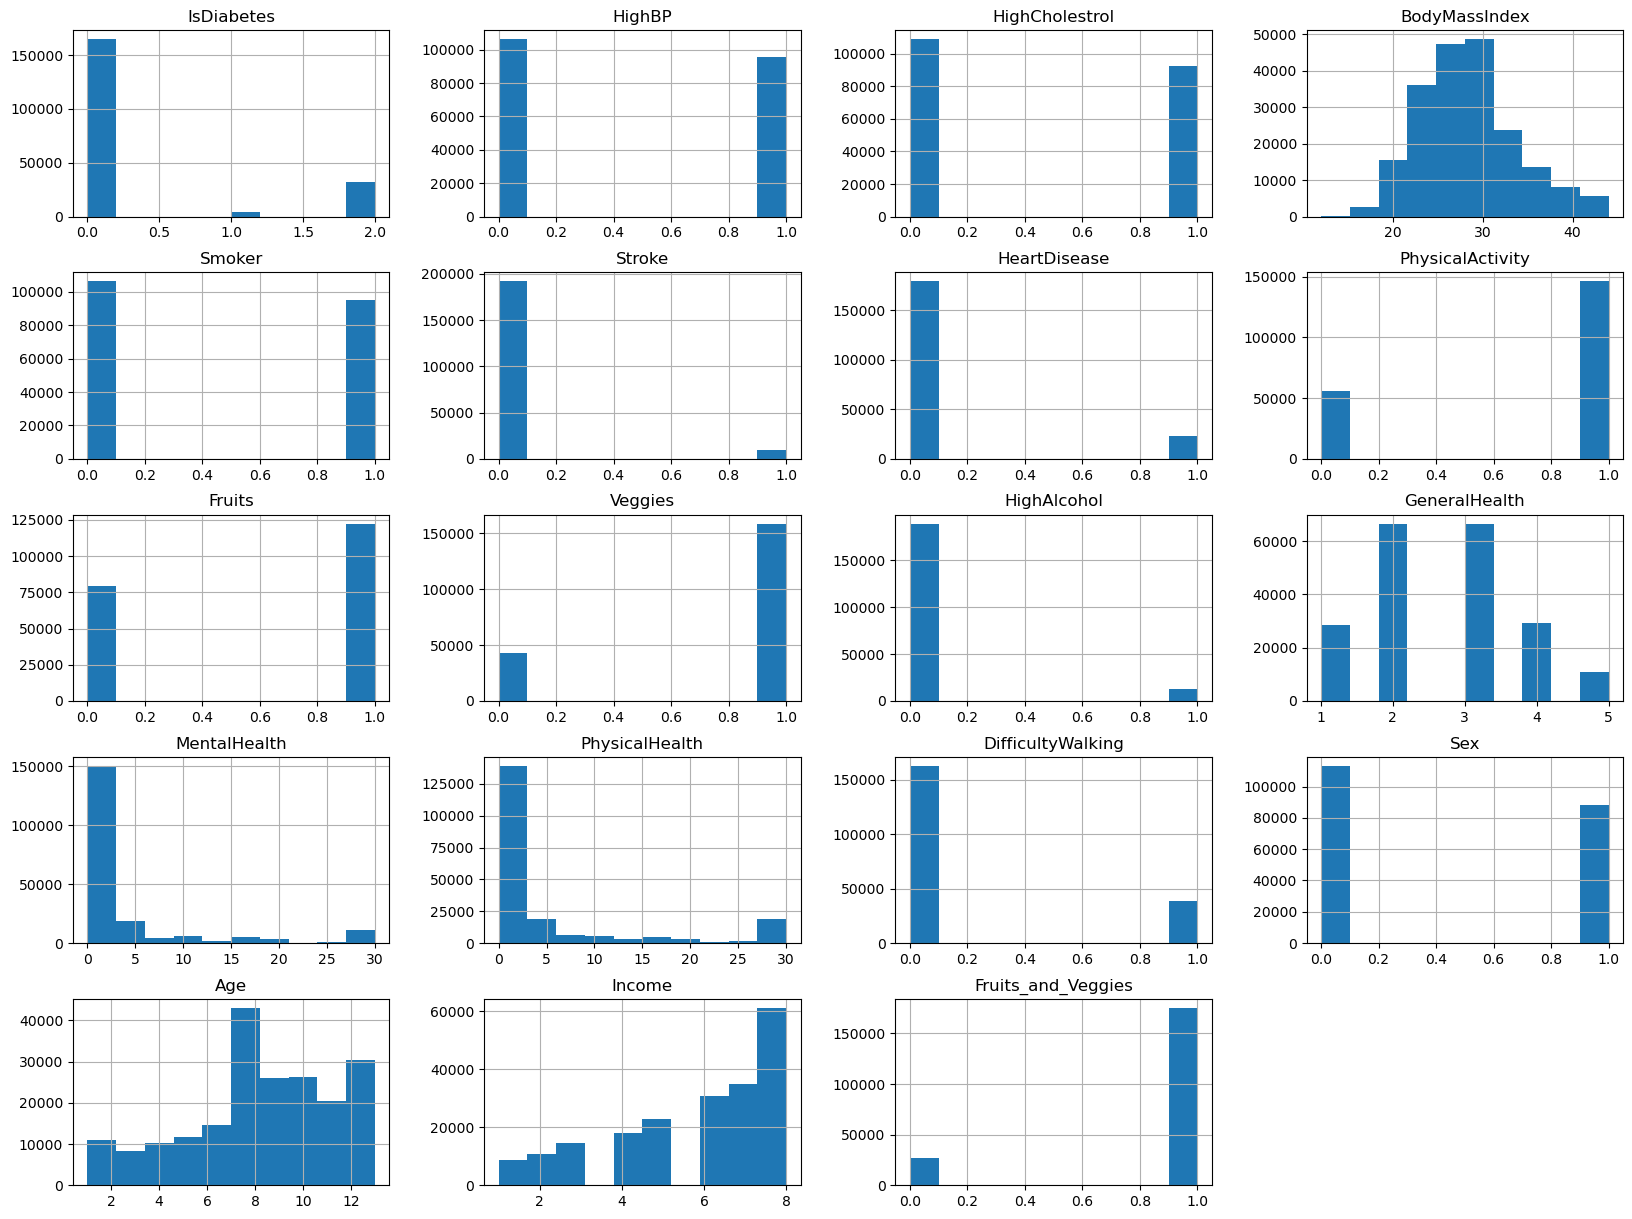

In [26]:
df.hist(figsize=(20,15));

## Data Distribution of IsDiabetic 

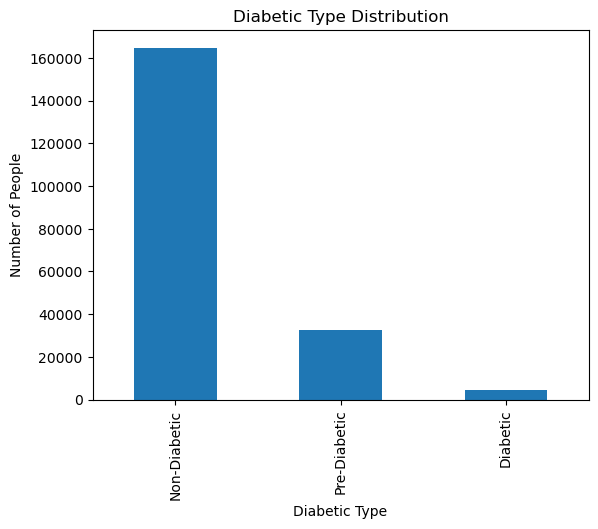

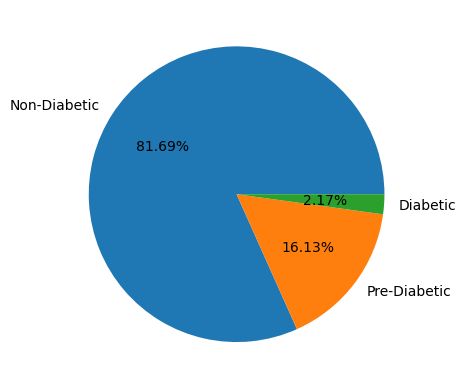

In [27]:
ax = df['IsDiabetes'].value_counts().plot(kind='bar', title= 'Diabetic Type Distribution')
ax.set_xlabel('Diabetic Type')
ax.set_ylabel('Number of People')

custom_labels = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']

# Set the custom labels for each bar on the x-axis
ax.set_xticklabels(custom_labels)

# Display the plot
plt.show()

plt.pie(df["IsDiabetes"].value_counts() , labels =custom_labels ,autopct='%.02f%%' );

## 	

## Correlation Across Dataset

Text(0.5, 1.0, 'Correlation of Features')

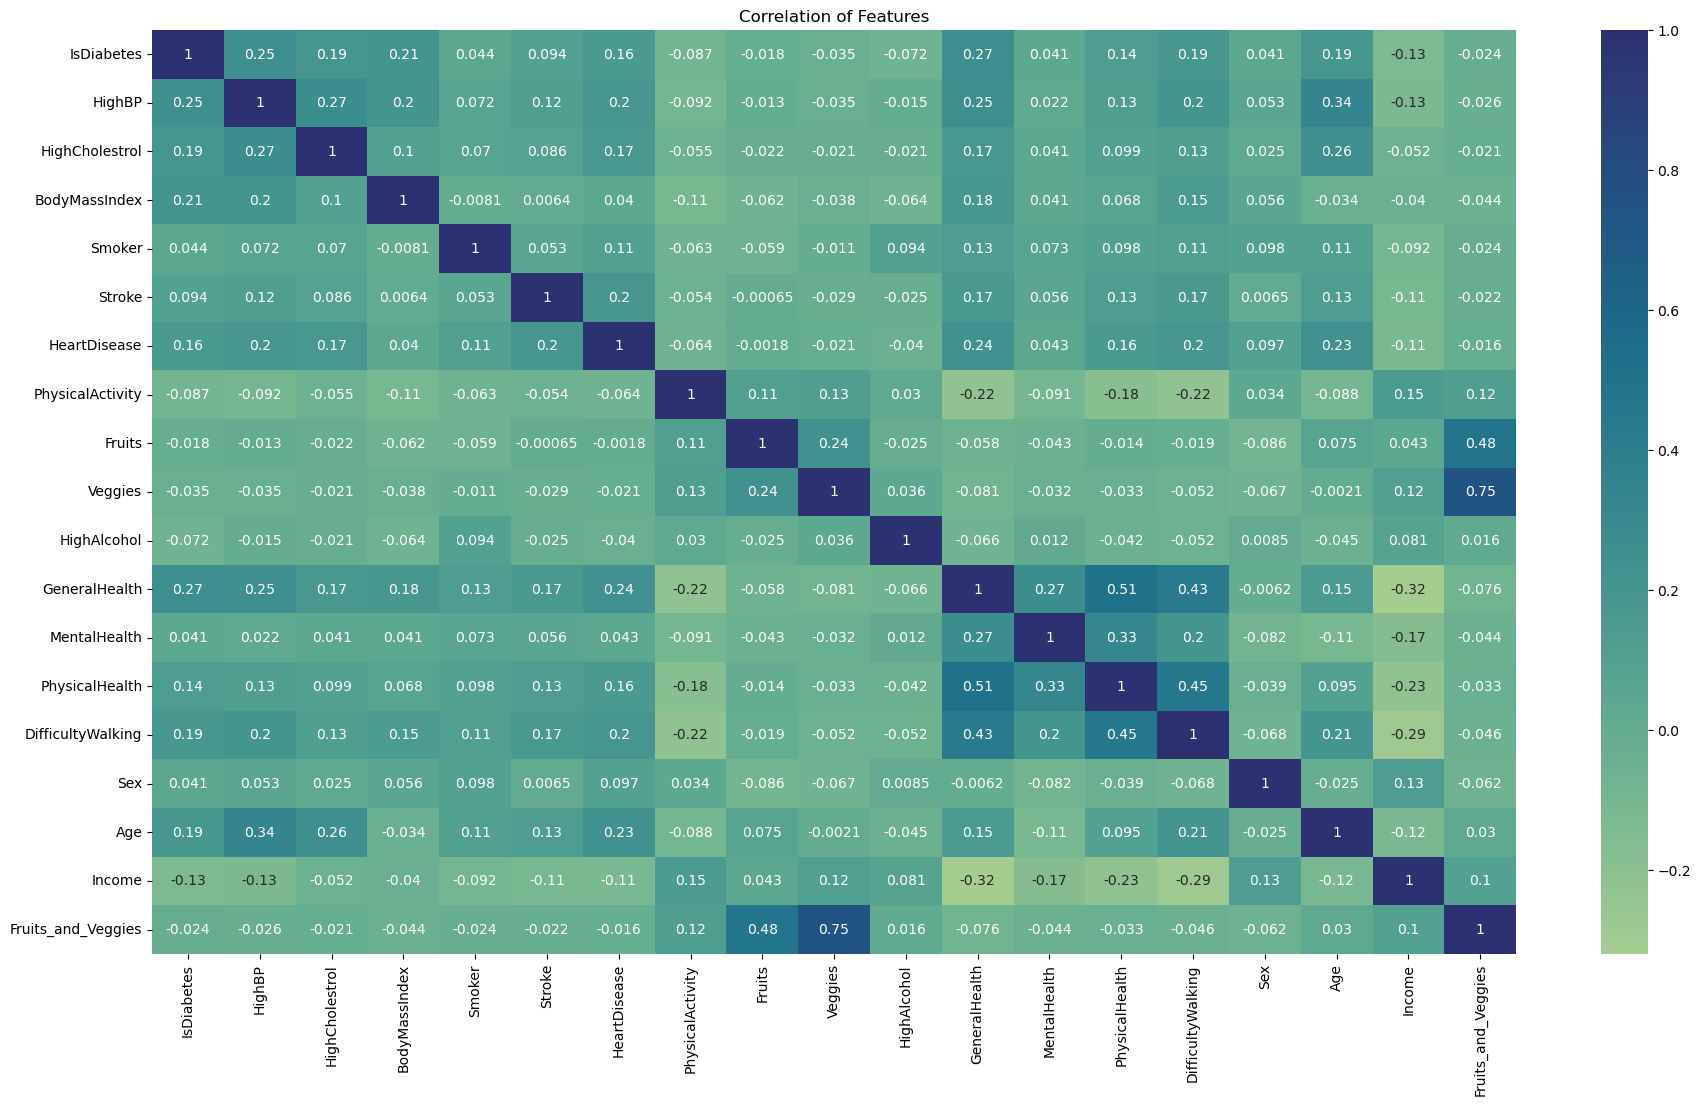

In [28]:
plt.figure(figsize = (22,12))
sns.heatmap(df.corr(), annot=True , cmap ='crest' )
plt.title("Correlation of Features")

## Blood Pressure vs IsDiabetic

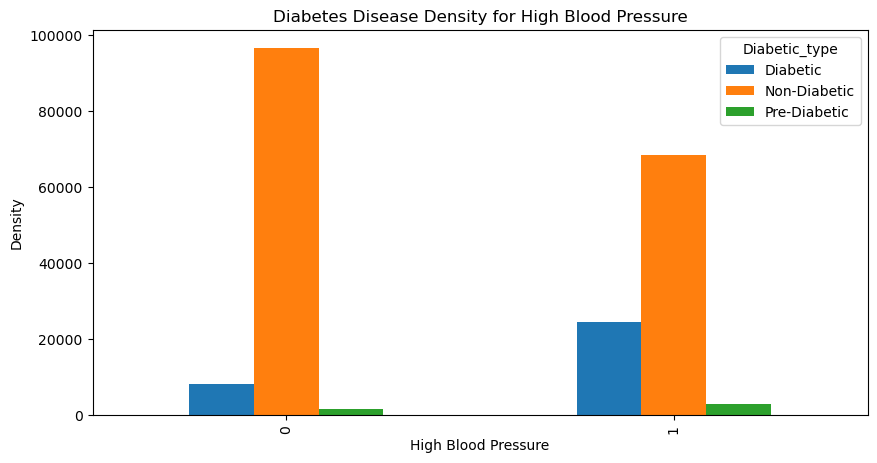

In [29]:
pd.crosstab(df.HighBP,df2.Diabetic_type).plot(kind="bar",figsize=(10,5))

plt.title('Diabetes Disease Density for High Blood Pressure')
plt.xlabel("High Blood Pressure")
plt.ylabel('Density')
plt.show()

## High Cholestrol vs IsDiabetic

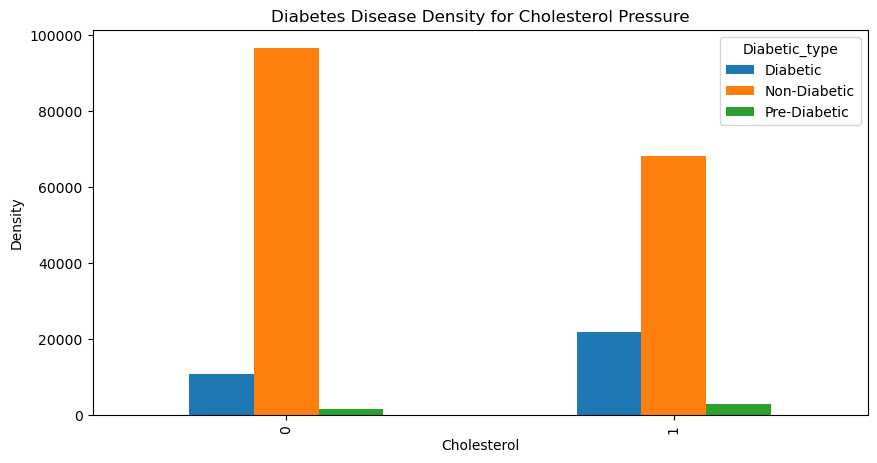

In [30]:
pd.crosstab(df.HighCholestrol,df2.Diabetic_type).plot(kind="bar",figsize=(10,5))

plt.title('Diabetes Disease Density for Cholesterol Pressure')
plt.xlabel("Cholesterol")
plt.ylabel('Density')
plt.show()

## Combined Effect of High Blood Pressure and High Cholesterol on Diabetes

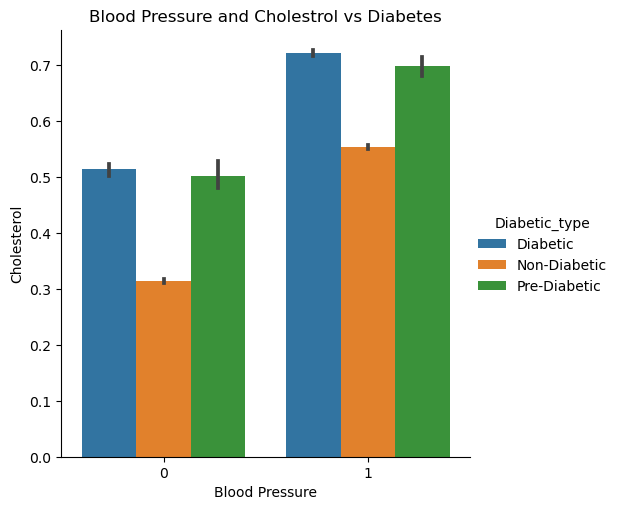

In [31]:
ax = sns.catplot(x="HighBP", y="HighCholestrol", data=df2, hue="Diabetic_type", kind="bar")
ax.set(xlabel='Blood Pressure', ylabel='Cholesterol')
plt.title("Blood Pressure and Cholestrol vs Diabetes")
plt.show()

## Effects of General Health on DiabeticType

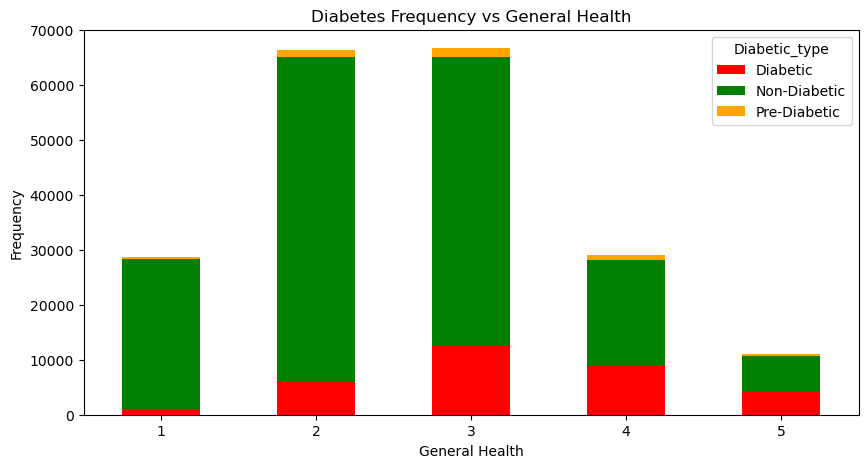

In [32]:
ct = pd.crosstab(df.GeneralHealth, df2.Diabetic_type)
colors = ["Red", "Green", "Orange"]
ax = ct.plot(kind="bar", figsize=(10, 5), color=colors, stacked = True)
ax.set_title("Diabetes Frequency vs General Health")
ax.set_xlabel("General Health")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ct.index, rotation=0)
plt.show()

## Classification of Different Age Group to Diabetes

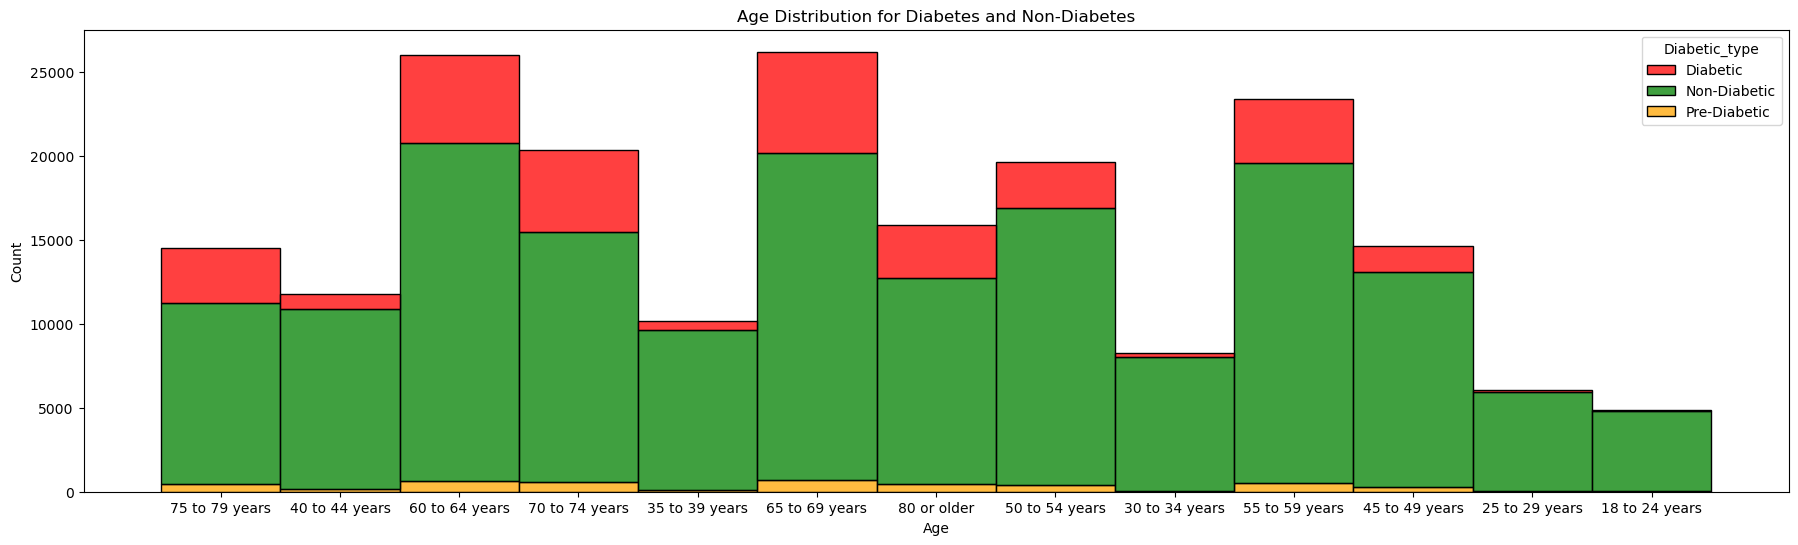

In [33]:
fig, ax = plt.subplots(figsize=(22, 6))
colors = ["Red", "Green", "Orange"]
sns.histplot(data=df2, x='Age', hue='Diabetic_type', multiple='stack', palette=colors)
plt.title('Age Distribution for Diabetes and Non-Diabetes')
plt.show()

## Variation of Diabetes based on Age and Body Mass Index

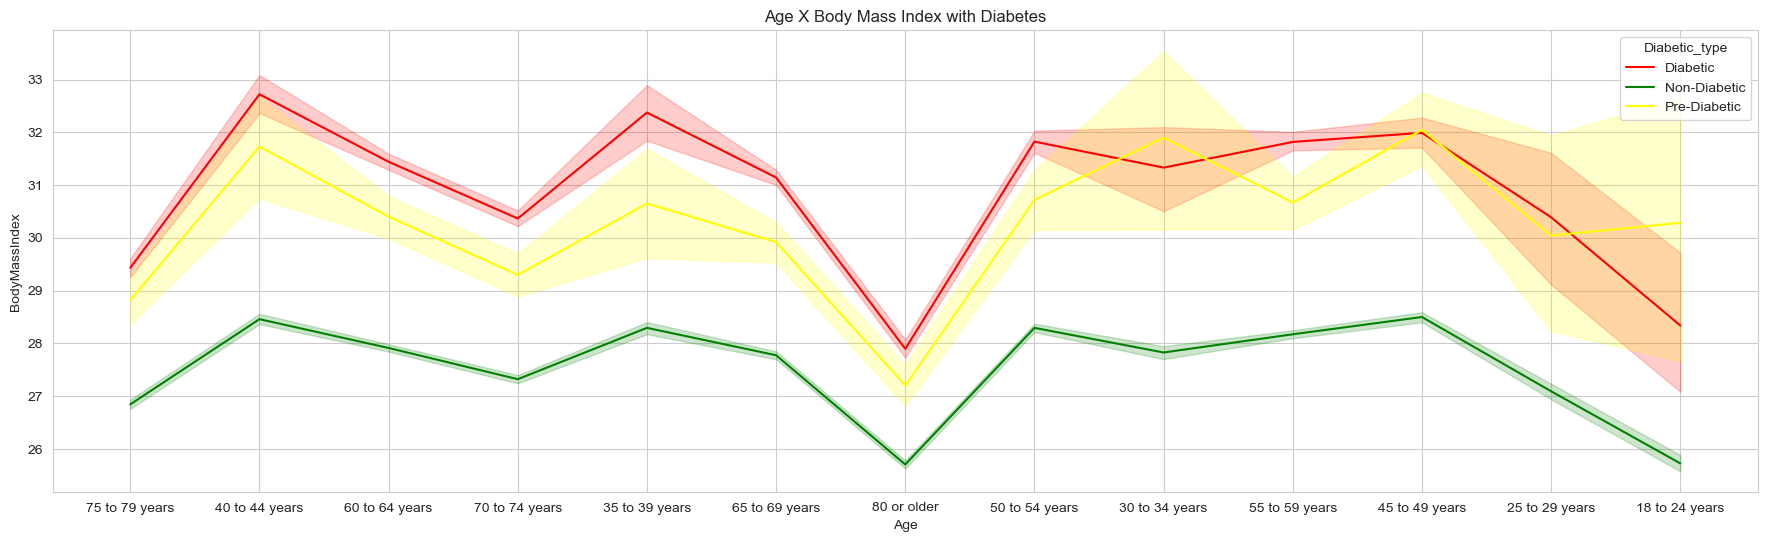

In [34]:
sns.set_style('whitegrid')
colors = ['red', 'green', 'yellow']
fig, ax = plt.subplots(figsize=(22, 6))
sns.lineplot(data=df2, x='Age', y='BodyMassIndex', hue='Diabetic_type', palette=colors)
plt.title('Age X Body Mass Index with Diabetes')
plt.show()

## Heatmap of Income Accross Diabetes

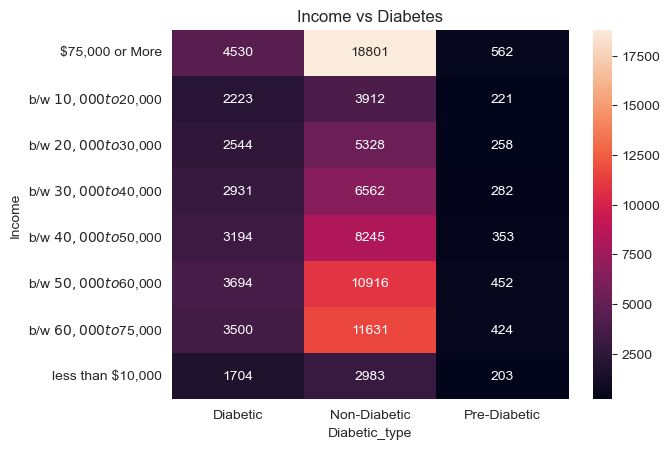

In [37]:
data = df2.pivot_table(index='Income', columns='Diabetic_type', values='HighBP', aggfunc='sum')
sns.heatmap(data, cmap='rocket', annot=True, fmt='g')
plt.title('Income vs Diabetes')
plt.show()

## Smoking vs Diabetes

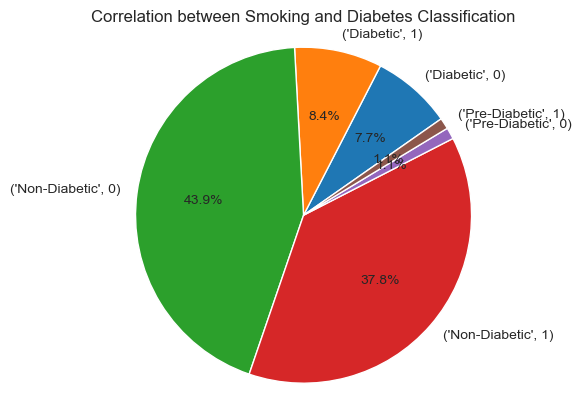

In [38]:
counts = df2.groupby(['Diabetic_type', 'Smoker']).size()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=35)
plt.axis('equal')
plt.title('Correlation between Smoking and Diabetes Classification')
plt.show()

## Impact of Heart Diseases on Diabetic Classification

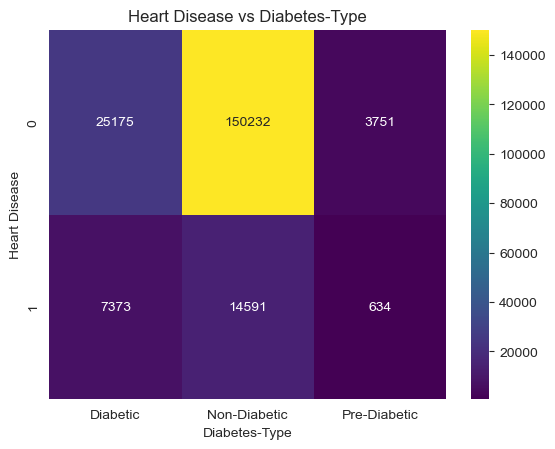

In [39]:
data = pd.crosstab(df.HeartDisease, df2.Diabetic_type)
sns.heatmap(data, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Diabetes-Type')
plt.ylabel('Heart Disease')
plt.title('Heart Disease vs Diabetes-Type')
plt.show()

## Diabetes Data Distribution Across Gender

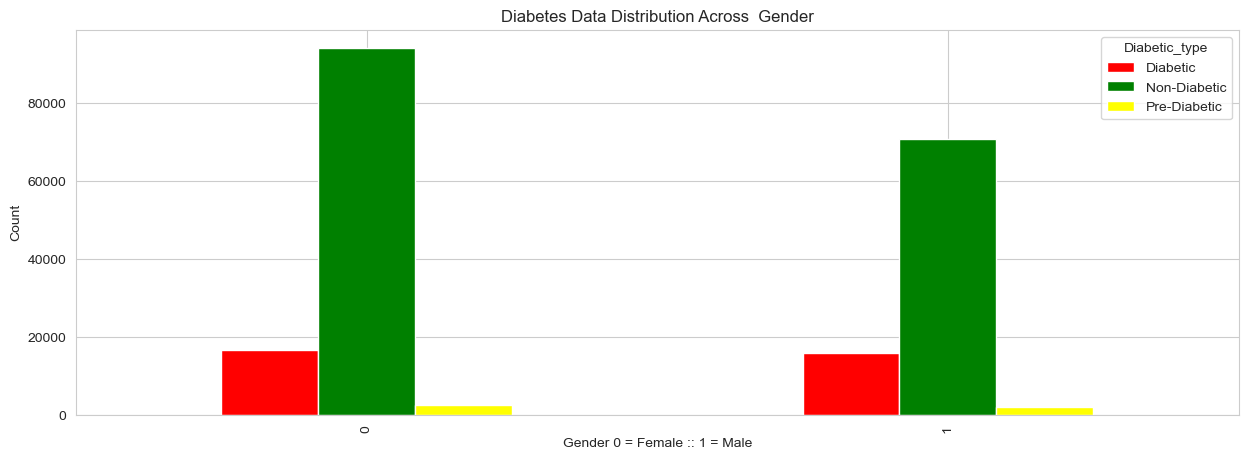

In [40]:
pd.crosstab(df.Sex,df2.Diabetic_type).plot(kind="bar",figsize=(15,5), color=['Red', 'Green', 'yellow'])
plt.title('Diabetes Data Distribution Across  Gender')
plt.xlabel("Gender 0 = Female :: 1 = Male")
plt.ylabel('Count')
plt.show()

# **Project Phase 2**

# **Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [42]:
dfML = df.copy()

In [43]:
X = df.drop('IsDiabetes', axis=1)
y = df['IsDiabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7505699841395718


In [44]:

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7505699841395718
F1 Score: 0.41811003244822126
Precision: 0.4065138686259453
Recall: 0.44120838835191517
Confusion Matrix:
 [[27023    13  6026]
 [  558     0   285]
 [ 3174     9  3264]]


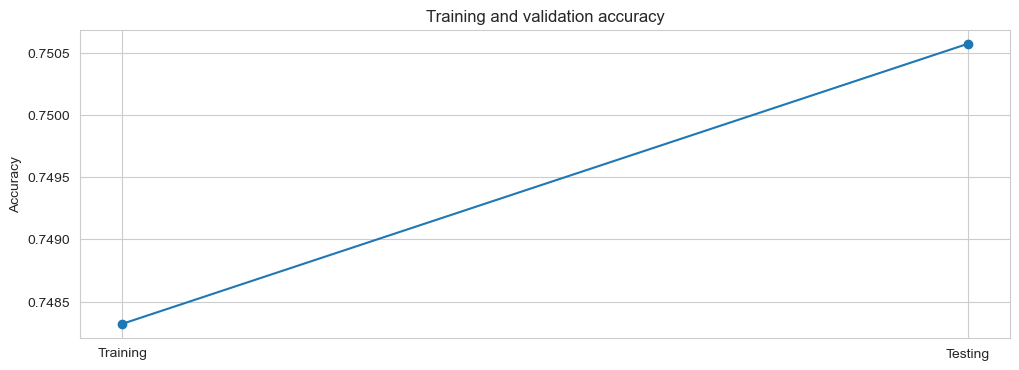

In [45]:

plt.figure(figsize=(12, 4))
plt.title('Training and validation accuracy')
plt.plot([1, 2], [nb.score(X_train, y_train), nb.score(X_test, y_test)], marker='o')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.show()

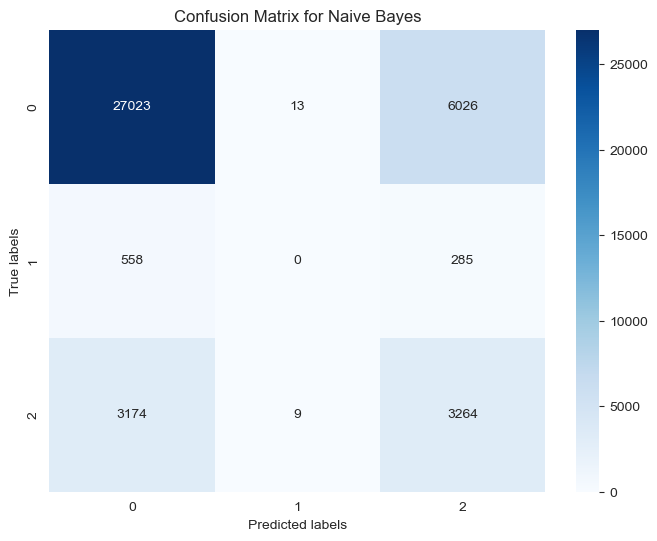

In [46]:
import seaborn as sns

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


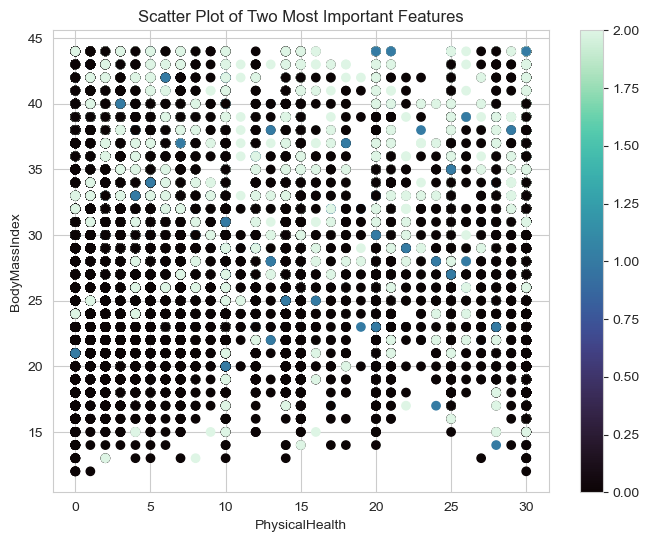

In [47]:
if hasattr(nb, 'coef_'):
    feature_importance = np.abs(nb.coef_)
    important_features = np.argsort(feature_importance)[0][-2:]
else:
    feature_importance = np.abs(nb.theta_ * nb.var_)
    important_features = np.argsort(feature_importance[0])[-2:]
X_imp = X.iloc[:, important_features]

plt.figure(figsize=(8, 6))
plt.scatter(X_imp.iloc[:, 0], X_imp.iloc[:, 1], c=y, cmap='mako')
plt.xlabel(X_imp.columns[0])
plt.ylabel(X_imp.columns[1])
plt.title('Scatter Plot of Two Most Important Features')
plt.colorbar()
plt.show()

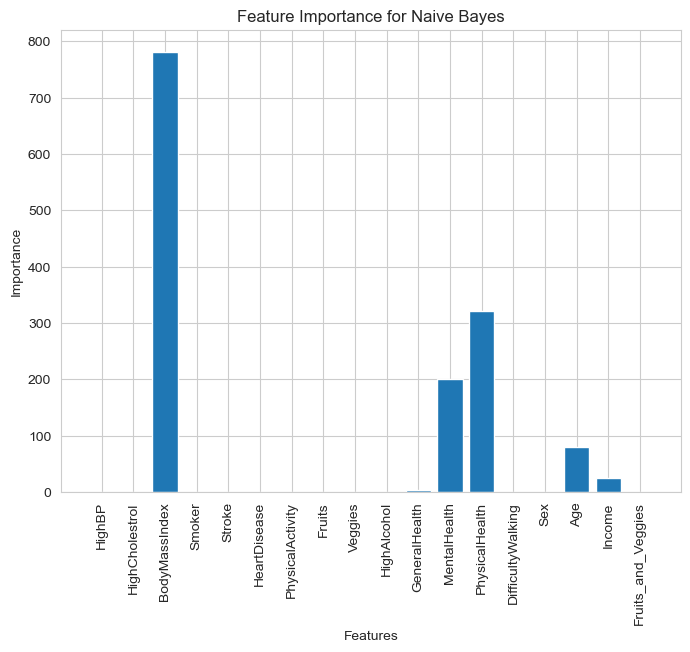

In [48]:
if hasattr(nb, 'coef_'):
    feature_importance = np.abs(nb.coef_)
else:
    feature_importance = np.abs(nb.theta_ * nb.var_)

plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importance[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Naive Bayes')
plt.show()

# **K-NearestNeighbors**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [65]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average="weighted"))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7277458366375892
F1 score: 0.7308654165036617
Precision: 0.7340812735656266
Recall: 0.7277458366375892
Confusion matrix:
[[27560   735  4767]
 [  623    29   191]
 [ 4482   188  1777]]


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [67]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNN:", accuracy_score(y_test, y_pred))
print("F1 score KNN:", f1_score(y_test, y_pred, average="weighted"))
print("Precision KNN:", precision_score(y_test, y_pred, average="weighted"))
print("Recall KNN:", recall_score(y_test, y_pred, average="weighted"))
print("Confusion matrix KNN:")
print(confusion_matrix(y_test, y_pred))

Accuracy KNN: 0.7878667724028549
F1 score KNN: 0.7619418317949067
Precision KNN: 0.7441648194704454
Recall KNN: 0.7878667724028549
Confusion matrix KNN:
[[30397    49  2616]
 [  715     5   123]
 [ 5035    22  1390]]


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [69]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNN:", accuracy_score(y_test, y_pred))
print("F1 score KNN:", f1_score(y_test, y_pred, average="weighted"))
print("Precision KNN:", precision_score(y_test, y_pred, average="weighted"))
print("Recall KNN:", recall_score(y_test, y_pred, average="weighted"))
print("Confusion matrix KNN:")
print(confusion_matrix(y_test, y_pred))

Accuracy KNN: 0.802934179222839
F1 score KNN: 0.7675722754154556
Precision KNN: 0.7491064046276026
Recall KNN: 0.802934179222839
Confusion matrix KNN:
[[31222    34  1806]
 [  735     2   106]
 [ 5253    18  1176]]


Text(0.5, 1.0, 'Confusion Matrix KNN')

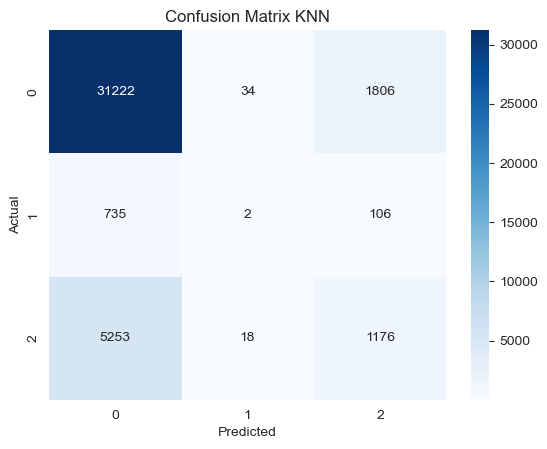

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')

# **Logistic Regression**

In [71]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [72]:
lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy LogisticRegression:', accuracy_score(y_test, y_pred))
print('F1 Score LogisticRegression:', f1_score(y_test, y_pred, average='macro'))
print('Precision LogisticRegression:', precision_score(y_test, y_pred, average='macro'))
print('Recall LogisticRegression:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix LogisticRegression:\n', confusion_matrix(y_test, y_pred))

Accuracy LogisticRegression: 0.82300753370341
F1 Score LogisticRegression: 0.3845370797162228
Precision LogisticRegression: 0.4528406659005329
Recall LogisticRegression: 0.37965190677240707
Confusion Matrix LogisticRegression:
 [[32133     0   929]
 [  774     0    69]
 [ 5370     0  1077]]


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
lr1 = LogisticRegression(C=10, max_iter=1000)
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy LogisticRegression:', accuracy_score(y_test, y_pred))
print('F1 Score LogisticRegression:', f1_score(y_test, y_pred, average='macro'))
print('Precision LogisticRegression:', precision_score(y_test, y_pred, average='macro'))
print('Recall LogisticRegression:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix LogisticRegression:\n', confusion_matrix(y_test, y_pred))

Accuracy LogisticRegression: 0.8229579698651863
F1 Score LogisticRegression: 0.384334355701278
Precision LogisticRegression: 0.4526714368596587
Recall LogisticRegression: 0.3795068779361443
Confusion Matrix LogisticRegression:
 [[32134     0   928]
 [  774     0    69]
 [ 5373     0  1074]]


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
lr = LogisticRegression(solver='newton-cg', max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
# Evaluate the model's performance
print('Accuracy LogisticRegression:', accuracy_score(y_test, y_pred))
print('F1 Score LogisticRegression:', f1_score(y_test, y_pred, average='macro'))
print('Precision LogisticRegression:', precision_score(y_test, y_pred, average='macro'))
print('Recall LogisticRegression:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix LogisticRegression:\n', confusion_matrix(y_test, y_pred))

Accuracy LogisticRegression: 0.82300753370341
F1 Score LogisticRegression: 0.3845370797162228
Precision LogisticRegression: 0.4528406659005329
Recall LogisticRegression: 0.37965190677240707
Confusion Matrix LogisticRegression:
 [[32133     0   929]
 [  774     0    69]
 [ 5370     0  1077]]


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_new, y_train)

y_pred = lr.predict(X_test_new)
lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy LogisticRegression:', accuracy_score(y_test, y_pred))
print('F1 Score LogisticRegression:', f1_score(y_test, y_pred, average='macro'))
print('Precision LogisticRegression:', precision_score(y_test, y_pred, average='macro'))
print('Recall LogisticRegression:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix LogisticRegression:\n', confusion_matrix(y_test, y_pred))

Accuracy LogisticRegression: 0.8225614591593973
F1 Score LogisticRegression: 0.3820111124463968
Precision LogisticRegression: 0.45136338395589987
Recall LogisticRegression: 0.3778471884452614
Confusion Matrix LogisticRegression:
 [[32154     0   908]
 [  775     0    68]
 [ 5409     0  1038]]


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix LogisticRegression')

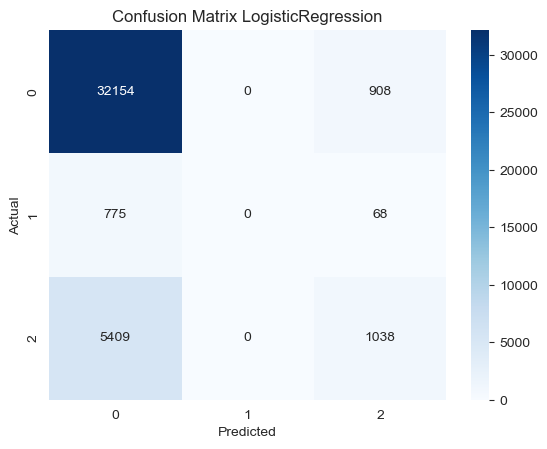

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LogisticRegression')

Text(0.5, 1.0, 'Feature Importance LogisticRegression')

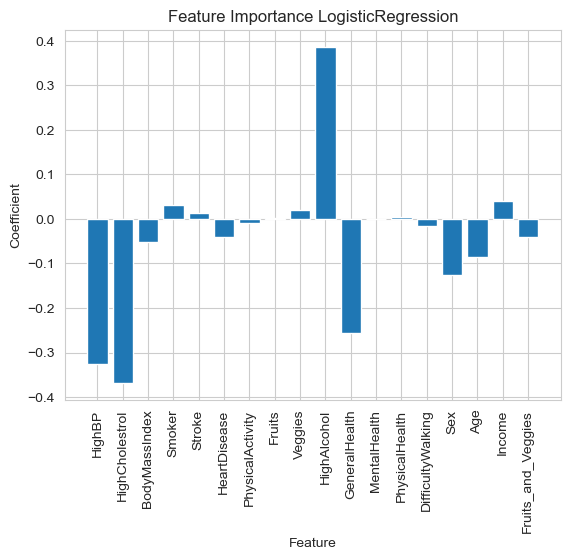

In [77]:
coef = lr1.coef_[0]
names = X.columns

plt.bar(names, coef)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance LogisticRegression')


# **Decision Tree Classifier**

In [112]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


In [113]:
dt_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy DecisionTreeClassifier:', accuracy_score(y_test, y_pred))
print('F1 Score DecisionTreeClassifier:', f1_score(y_test, y_pred, average='macro'))
print('Precision DecisionTreeClassifier:', precision_score(y_test, y_pred, average='macro'))
print('Recall DecisionTreeClassifier:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix DecisionTreeClassifier:\n', confusion_matrix(y_test, y_pred))


Accuracy DecisionTreeClassifier: 0.723458564631245
F1 Score DecisionTreeClassifier: 0.3836197735362014
Precision DecisionTreeClassifier: 0.3821561122050871
Recall DecisionTreeClassifier: 0.38614419055654986
Confusion Matrix DecisionTreeClassifier:
 [[27276   863  4923]
 [  624    35   184]
 [ 4284   281  1882]]


Text(0.5, 1.0, 'Confusion Matrix DecisionTreeClassifier')

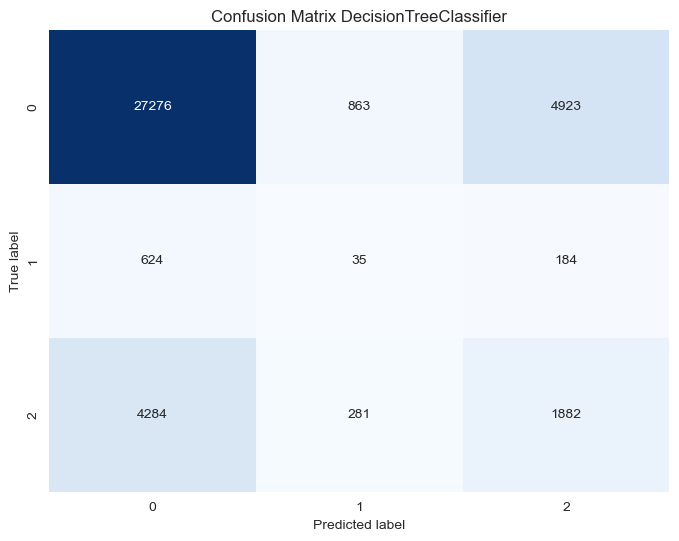

In [114]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix DecisionTreeClassifier')

Text(0.5, 1.0, 'Decision Tree Feature Importance')

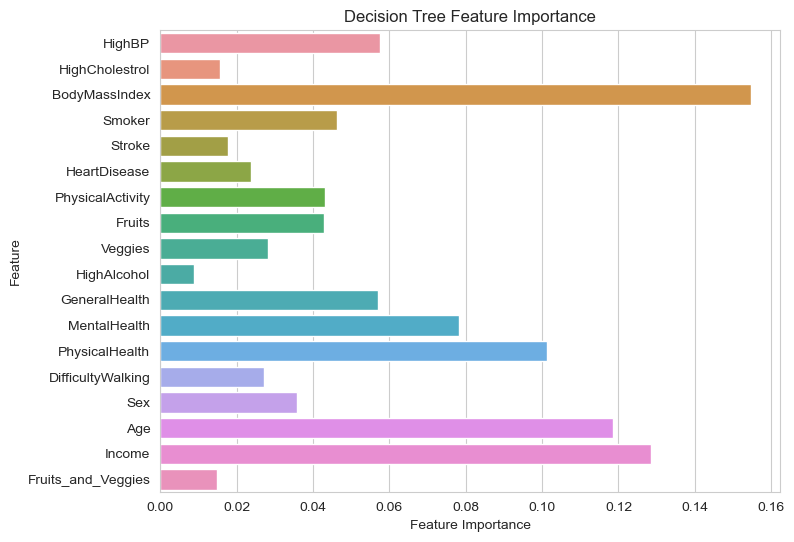

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dt.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')


# **Random Forest**

In [116]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [117]:
rf_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy RandomForest Classifier:', accuracy_score(y_test, y_pred))
print('F1 Score RandomForest Classifier:', f1_score(y_test, y_pred, average='macro'))
print('Precision RandomForest Classifier:', precision_score(y_test, y_pred, average='macro'))
print('Recall RandomForest Classifier:', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix RandomForest Classifier:\n', confusion_matrix(y_test, y_pred))

Accuracy RandomForest Classifier: 0.8042228390166535
F1 Score RandomForest Classifier: 0.3804471895588919
Precision RandomForest Classifier: 0.41120952738823613
Recall RandomForest Classifier: 0.3768794225104027
Confusion Matrix RandomForest Classifier:
 [[31258    75  1729]
 [  736     0   107]
 [ 5237    16  1194]]


Text(0.5, 1.0, 'Confusion Matrix RandomForestClassifier')

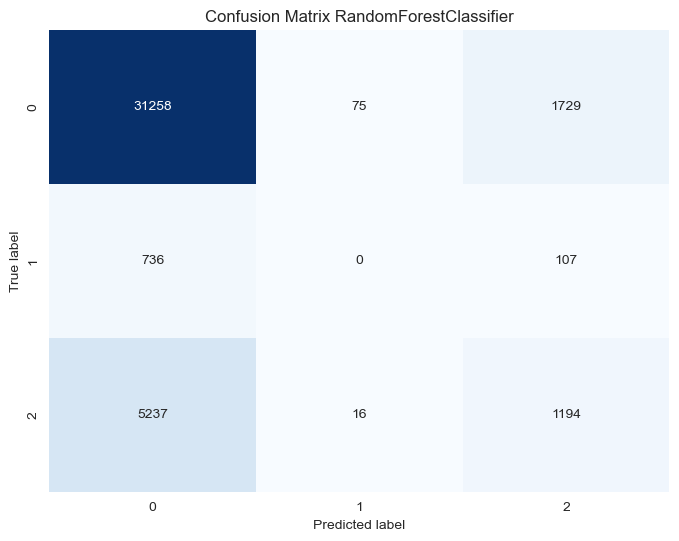

In [118]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix RandomForestClassifier')

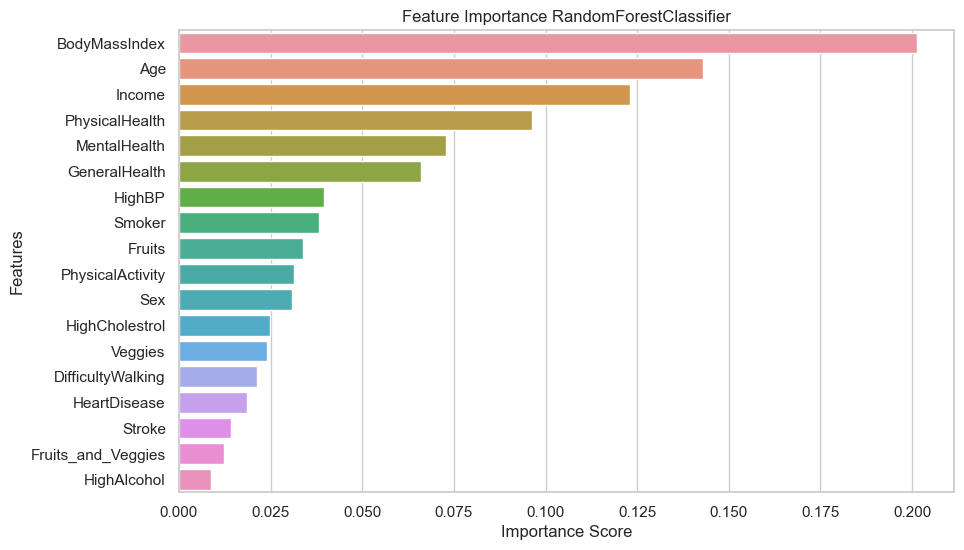

In [119]:
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance RandomForestClassifier')
plt.show()

# **Neural Networks**

In [125]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dfML.drop('IsDiabetes', axis=1),
    dfML['IsDiabetes'],
    test_size=0.2,
    random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Neural Netowrk Accuracy:', test_acc)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
nn_accuracy = test_acc
print('Neural Netowrk Accuracy::', test_acc)

In [ ]:
y_predtions = model.predict(X_test)
y_pred_classes1 = (y_predtions > 0.5).astype(int)
confusion_mtx = confusion_matrix(y_test, y_pred_classes1)

sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Neural Network')
plt.show()

In [ ]:
models = ['Naive Bayes','KNN', 'Logistic Regression', 'Decision Trees', 'Random Forest', 'Neural Networks']
accuracies = [nb_accuracy, knn_accuracy,lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy]

df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(8, 6))
chart = sns.barplot(x='Model', y='Accuracy', data=df, palette='flare', alpha=1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## References 
1. https://pandas.pydata.org/docs/user_guide/visualization.html
2. https://seaborn.pydata.org/tutorial/distributions.html
3. https://matplotlib.org/stable/tutorials/introductory/pyplot.html
4. https://towardsdatascience.com/understanding-random-forest-58381e0602d2 
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
7. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
8. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
9. https://scikit-learn.org/stable/modules/naive_bayes.html 
10. https://www.tensorflow.org/api_docs/python/tf/keras/Model 

In [116]:
import pickle

In [200]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(lr1, file)

In [201]:
df.head()

,IsDiabetes,HighBP,HighCholestrol,BodyMassIndex,Smoker,Stroke,HeartDisease,PhysicalActivity,Fruits,Veggies,HighAlcohol,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Income,Fruits_and_Veggies
0,2,0,1,24,1,0,0,1,1,1,0,2,5,0,0,0,12,5,1
1,0,0,1,32,1,0,0,1,1,1,0,3,0,3,0,1,5,6,1
2,0,0,0,23,1,0,0,1,1,1,0,1,1,0,0,0,9,5,1
3,0,0,1,21,0,0,0,1,1,1,0,1,0,0,0,0,11,5,1
5,0,0,0,28,1,0,0,1,0,0,0,1,0,0,0,1,4,6,0


In [224]:
with open('diabetes_model.pkl', 'rb') as f:
    test = pickle.load(f)

# Make predictions on new data
new_data = pd.DataFrame({
    'HighBP': [1],
    'HighCholestrol': [1],
    'BodyMassIndex': [40],
    'Smoker': [1],
    'Stroke': [1],
    'HeartDisease': [1],
    'PhysicalActivity': [0],
    'Fruits': [0],
    'Veggies': [0],
    'HighAlcohol': [1],
    'GeneralHealth': [4],
    'MentalHealth': [10],
    'PhysicalHealth': [10],
    'DifficultyWalking': [1],
    'Sex': [0],
    'Age': [11],
    'Income': [2],
    'Fruits_and_Veggies': [0]
})


prediction = test.predict(new_data)

# Print the prediction
print('Prediction:', prediction)

Prediction: [2]
